In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter
import numpy as np
import re


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Now, you can access your data in Google Drive
# For example, if your data is in a folder named 'data' in the root of your Google Drive:
data_path = '/content/drive/My Drive/Test Suicide/reddit_suicide_detection_final_clean.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv(data_path)

In [ ]:
data.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threaten suicide recently leave wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know girl but...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally never hear bad year swear fucking god ...
3,i need helpjust help me im crying so hard,suicide,need help help cry hard
4,It ends tonight.I can’t do it anymore. \nI quit.,suicide,end tonight not anymore quit


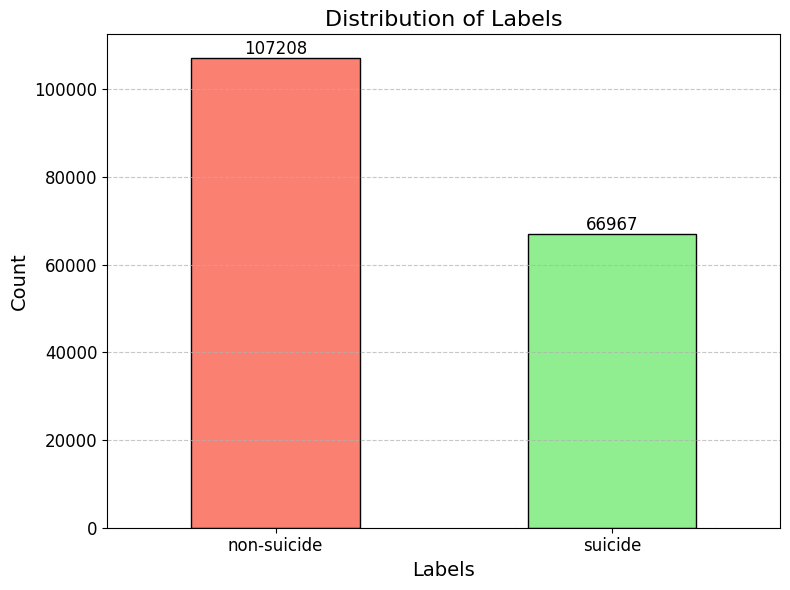

In [ ]:
label_counts = data['class'].value_counts()

# Create bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size
bars = label_counts.plot(kind='bar', color=['salmon', 'lightgreen'], edgecolor='black')  # Custom colors
plt.xlabel('Labels', fontsize=14)  # X-axis label with fontsize
plt.ylabel('Count', fontsize=14)  # Y-axis label with fontsize
plt.title('Distribution of Labels', fontsize=16)  # Title with fontsize
plt.xticks(rotation=0, fontsize=12)  # Rotate x-axis labels and set fontsize
plt.yticks(fontsize=12)  # Set fontsize for y-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add counts on the bars
for bar, count in zip(bars.patches, label_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, count,
             ha='center', va='bottom', fontsize=12, color='black')

plt.show()

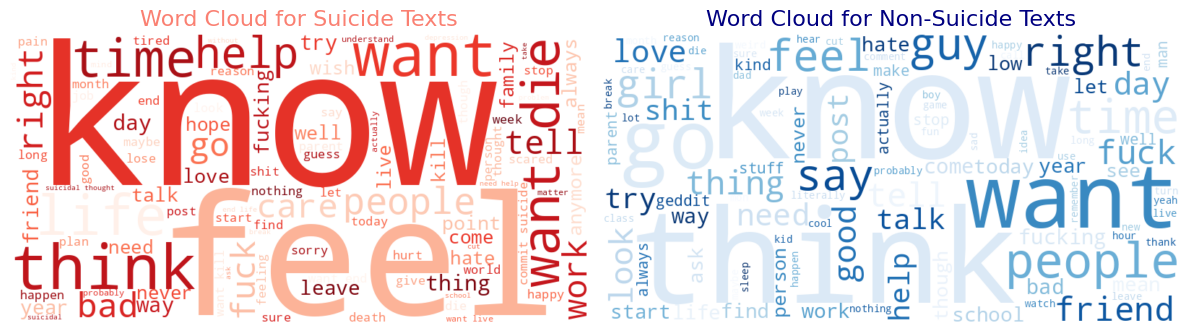

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate texts based on labels
suicide_texts = ' '.join(data[data['class'] == 'suicide']['cleaned_text'].astype(str))
non_suicide_texts = ' '.join(data[data['class'] == 'non-suicide']['cleaned_text'].astype(str))

# Generate word clouds
suicide_wordcloud = WordCloud(width=800, height=400, background_color='white',
                              colormap='Reds', max_words=100, contour_width=3,
                              contour_color='firebrick').generate(suicide_texts)
non_suicide_wordcloud = WordCloud(width=800, height=400, background_color='white',
                                  colormap='Blues', max_words=100, contour_width=3,
                                  contour_color='navy').generate(non_suicide_texts)

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(suicide_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Suicide Texts', fontsize=16, color='salmon')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_suicide_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Non-Suicide Texts', fontsize=16, color='navy')
plt.axis('off')

plt.tight_layout()
plt.show()


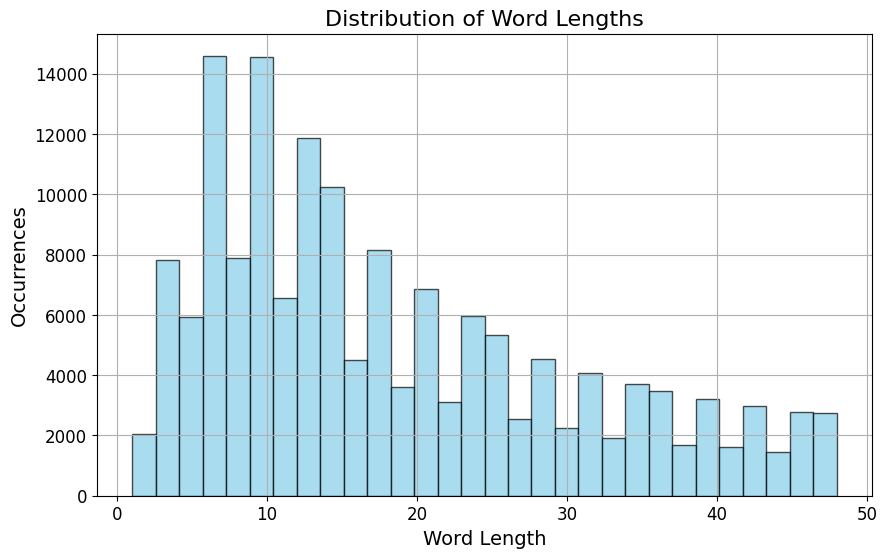

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Filter out NaN values and clean text
cleaned_texts = data['cleaned_text'].dropna()
words_count = cleaned_texts.apply(lambda text: len(re.sub(' {2,}', ' ', text).split(' '))).values

# Calculate median and median absolute deviation
d = np.abs(words_count - np.median(words_count))
mdev = np.median(d)

# Calculate z-scores
s = d / mdev if mdev else np.zeros(len(d))

# Discard outliers
words_count = words_count[s < 3.5]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(words_count, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Beautify plot
plt.xlabel('Word Length', fontsize=14)
plt.ylabel('Occurrences', fontsize=14)
plt.title('Distribution of Word Lengths', fontsize=16)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


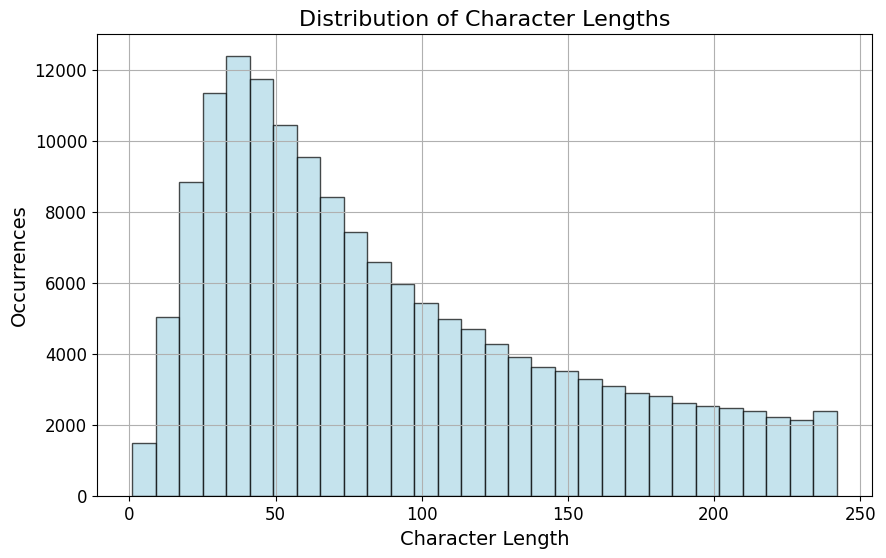

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate character count for each cleaned text
characters_count = cleaned_texts.apply(lambda text: len(text.replace(' ', ''))).values

# Calculate median and median absolute deviation
d = np.abs(characters_count - np.median(characters_count))
mdev = np.median(d)

# Calculate z-scores
s = d / mdev if mdev else np.zeros(len(d))

# Discard outliers
characters_count = characters_count[s < 3.5]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(characters_count, bins=30, color='lightblue', edgecolor='black', alpha=0.7)

# Beautify plot
plt.xlabel('Character Length', fontsize=14)
plt.ylabel('Occurrences', fontsize=14)
plt.title('Distribution of Character Lengths', fontsize=16)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


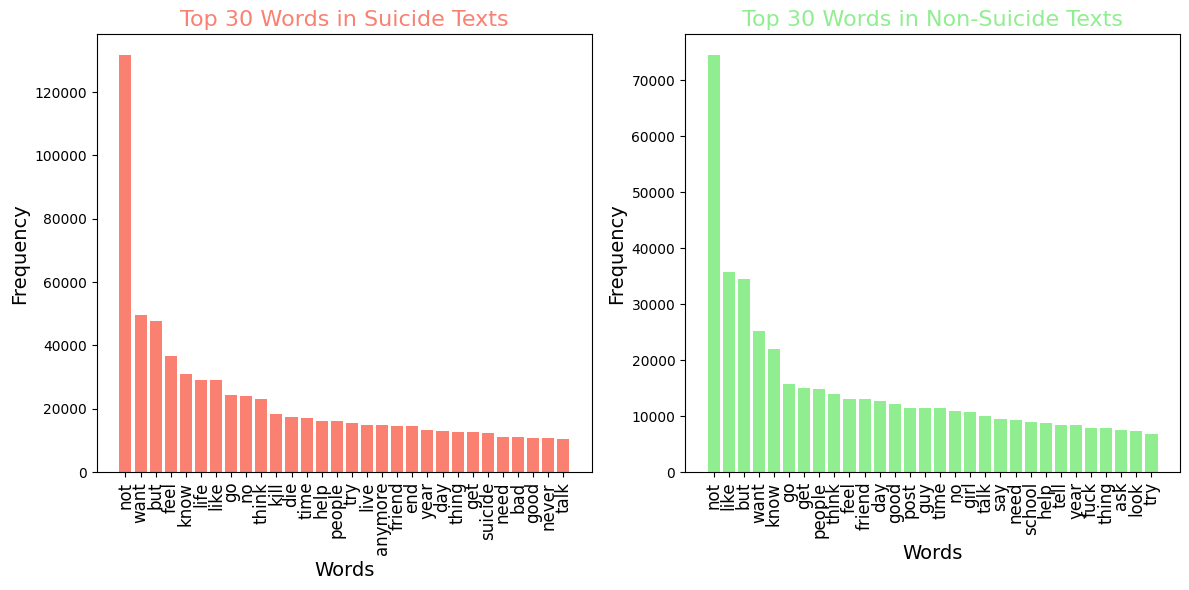

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Convert 'cleaned_text' column to strings and drop NaN values
suicide_texts = ' '.join(data[data['class'] == 'suicide']['cleaned_text'].astype(str).dropna().tolist())
non_suicide_texts = ' '.join(data[data['class'] == 'non-suicide']['cleaned_text'].astype(str).dropna().tolist())

# Tokenize the texts
suicide_tokens = word_tokenize(suicide_texts)
non_suicide_tokens = word_tokenize(non_suicide_texts)

# Count word frequencies
suicide_word_freq = Counter(suicide_tokens)
non_suicide_word_freq = Counter(non_suicide_tokens)

# Plot the frequency of words in each category using bar charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(*zip(*suicide_word_freq.most_common(30)), color='salmon')
plt.title('Top 30 Words in Suicide Texts', fontsize=16, color='salmon')
plt.xlabel('Words', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(1, 2, 2)
plt.bar(*zip(*non_suicide_word_freq.most_common(30)), color='lightgreen')
plt.title('Top 30 Words in Non-Suicide Texts', fontsize=16, color='lightgreen')
plt.xlabel('Words', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()


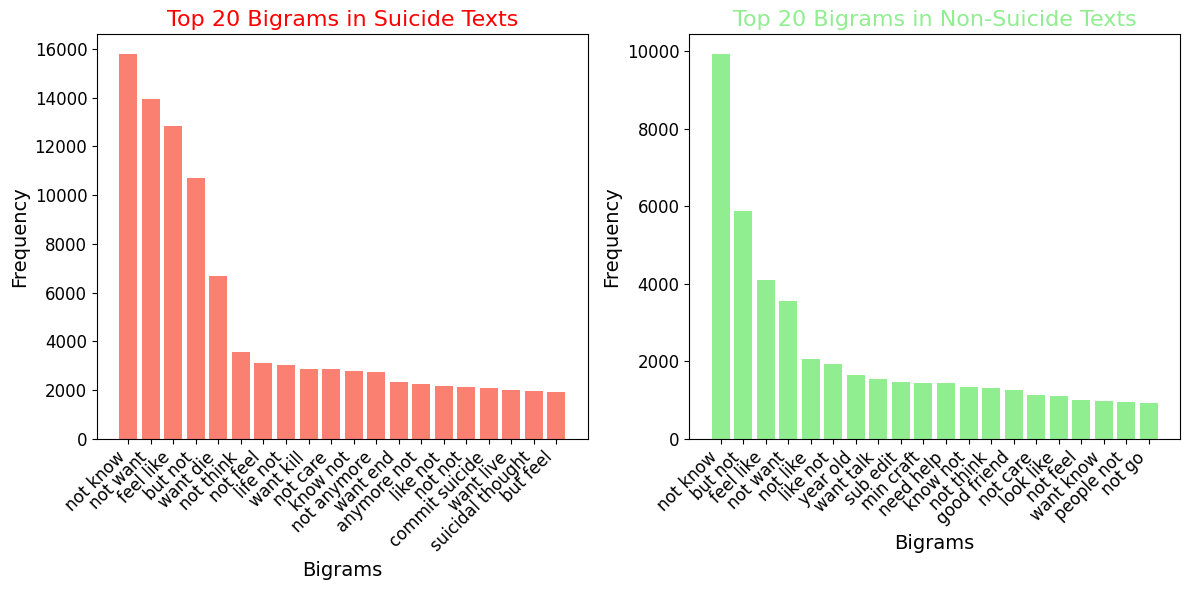

In [ ]:
from nltk import bigrams
from collections import Counter
import matplotlib.pyplot as plt

# Concatenate all texts for each class
suicide_texts = ' '.join(data[data['class'] == 'suicide']['cleaned_text'].astype(str).dropna().tolist())
non_suicide_texts = ' '.join(data[data['class'] == 'non-suicide']['cleaned_text'].astype(str).dropna().tolist())

# Tokenize the texts into words
suicide_tokens = suicide_texts.split()
non_suicide_tokens = non_suicide_texts.split()

# Generate bigrams
suicide_bigrams = list(bigrams(suicide_tokens))
non_suicide_bigrams = list(bigrams(non_suicide_tokens))

# Count the occurrences of each bigram
suicide_bigram_freq = Counter(suicide_bigrams)
non_suicide_bigram_freq = Counter(non_suicide_bigrams)

# Get the most common bigrams
top_suicide_bigrams = suicide_bigram_freq.most_common(20)
top_non_suicide_bigrams = non_suicide_bigram_freq.most_common(20)

# Plot the most common bigrams for suicide texts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(*zip(*[(f"{bigram[0]} {bigram[1]}", count) for bigram, count in top_suicide_bigrams]), color='salmon')
plt.title('Top 20 Bigrams in Suicide Texts', fontsize=16, color='red')
plt.xlabel('Bigrams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Plot the most common bigrams for non-suicide texts
plt.subplot(1, 2, 2)
plt.bar(*zip(*[(f"{bigram[0]} {bigram[1]}", count) for bigram, count in top_non_suicide_bigrams]), color='lightgreen')
plt.title('Top 20 Bigrams in Non-Suicide Texts', fontsize=16, color='lightgreen')
plt.xlabel('Bigrams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


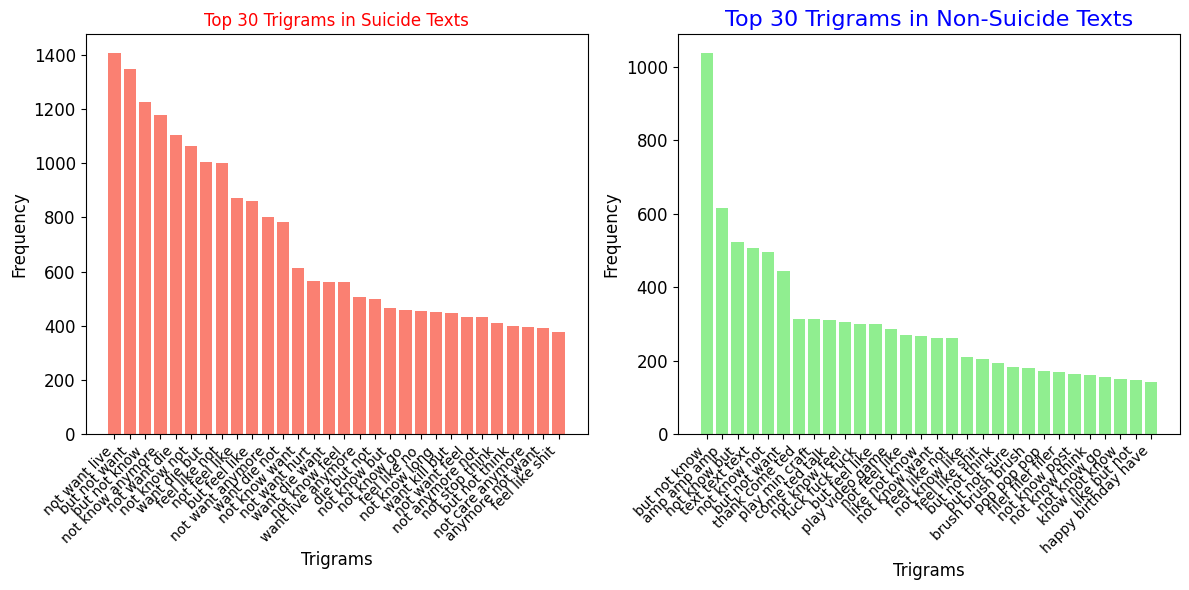

In [ ]:
from nltk import trigrams
from collections import Counter
import matplotlib.pyplot as plt

# Concatenate all texts for each class
suicide_texts = ' '.join(data[data['class'] == 'suicide']['cleaned_text'].astype(str).dropna().tolist())
non_suicide_texts = ' '.join(data[data['class'] == 'non-suicide']['cleaned_text'].astype(str).dropna().tolist())

# Tokenize the texts into words
suicide_tokens = suicide_texts.split()
non_suicide_tokens = non_suicide_texts.split()

# Generate trigrams
suicide_trigrams = list(trigrams(suicide_tokens))
non_suicide_trigrams = list(trigrams(non_suicide_tokens))

# Count the occurrences of each trigram
suicide_trigram_freq = Counter(suicide_trigrams)
non_suicide_trigram_freq = Counter(non_suicide_trigrams)

# Get the most common trigrams
top_suicide_trigrams = suicide_trigram_freq.most_common(30)
top_non_suicide_trigrams = non_suicide_trigram_freq.most_common(30)

# Plot the most common trigrams for suicide texts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(*zip(*[(f"{trigram[0]} {trigram[1]} {trigram[2]}", count) for trigram, count in top_suicide_trigrams]), color='salmon')
plt.title('Top 30 Trigrams in Suicide Texts', fontsize=12, color='red')
plt.xlabel('Trigrams', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

# Plot the most common trigrams for non-suicide texts
plt.subplot(1, 2, 2)
plt.bar(*zip(*[(f"{trigram[0]} {trigram[1]} {trigram[2]}", count) for trigram, count in top_non_suicide_trigrams]), color='lightgreen')
plt.title('Top 30 Trigrams in Non-Suicide Texts', fontsize=16, color='blue')
plt.xlabel('Trigrams', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
